In [1]:
import tweepy
from textblob import TextBlob
import pandas as pd
import re
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 

In [2]:
TWITTER_APP_KEY='W91If2D8YW1Jdxok4nsGu2BsT'
TWITTER_APP_SECRET='7WgSkCrrjjlEwDQ7Ub5REy3wZ8eEnadLzQw2ocnEvhcWPuIpqM'
TWITTER_KEY='974719067566243840-n29UI0cLSqYr61LkRVlP4YzTX5FXAXE'
TWITTER_SECRET='RwN6LeLBMjJmaAlloTjxA1Ji64LZ2LqFfHfYcDAHDwRMu'

In [4]:
auth = tweepy.OAuthHandler(TWITTER_APP_KEY, TWITTER_APP_SECRET)
auth.set_access_token(TWITTER_KEY, TWITTER_SECRET)

In [5]:
api = tweepy.API(auth)

In [6]:
#-----CREATING CSV FILE
import csv

# Open/create a file to append data to it
csvFile = open('result.csv', 'a', newline='',encoding="utf-8")

#Use csv writer
csvWriter = csv.writer(csvFile)
#print(len(list(csv.reader(open('result.csv','r+',encoding="utf-8")))))
#FOR CREATING HEADING
if (len(list(csv.reader(open('result.csv','r+',encoding="utf-8"))))==0):
    csvWriter.writerow(["S.no.","text","username","posted tweet count","favorite_count","retweet_count","time","clean text","sentiment polarity"])
   

In [7]:
(len(list(csv.reader(open('result.csv','r+',encoding="utf-8")))))+1

1955

In [8]:
#---- Data preprocessing/ cleaning steps
# ---function to replace elongated words-----
def replaceElongated(word):
    """ Replaces an elongated word with its basic form, unless the word exists in the lexicon """

    repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
    repl = r'\1\2\3'
    if wordnet.synsets(word):
        return word
    repl_word = repeat_regexp.sub(repl, word)
    if repl_word != word:      
        return replaceElongated(repl_word)
    else:       
        return repl_word
#text='@rit textGuess who’s bored awessoommee at the holiday table again? #sadddd textMight just fw Bayou Classic :) I can’t be at home boredTaking requests as well. https://t.co/m3YEbeWy8S  123b'
text='textHer only other prospect was Myrtle Crow, who was seventy years old and bored with her life. Myrtle was a capable cook, but she liked to gossip\r\n\r\nZachgo, Gloria . The Rocking Horse (p. 59).  . Kindle Edition. https://t.co/cxJJy4y9ZH #Amazon #ebook #kindledeals https://t.co/kQomOG9OF2'

def preprocess(text):
    # remove hyperlinks
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',text)
    text = re.sub(r'#([^\s]+)', r'\1', text)
    
    # """ Removes hastag in front of a word """
    text = re.sub(r'#([^\s]+)', r'\1', text)
    
    #remove mentions @
    text = re.sub('@[^\s]+','',text)
    #make everything lowercase;
    text=(text.lower())
    
    #(3) remove numbers
    text = ''.join([i for i in text if not i.isdigit()])
    
    #---remove special characters
    text=re.sub('[^A-Za-z]+', ' ', text)
    tokens = nltk.word_tokenize(text)
    onlyOneSentenceTokens = []
    ps = PorterStemmer()
    for w in tokens:
        final_word=ps.stem(w)
        final_word = replaceElongated(final_word)
        onlyOneSentenceTokens.append(final_word)
    onlyOneSentence = " ".join(onlyOneSentenceTokens)
    return onlyOneSentence
    #return text

def emoti_stopwords_stemming(text):
    #--remove emoticons 
    text = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', '', text)           
    
    #--remove stopwords and stemming
    onlyOneSentenceTokens = []
    tokens = nltk.word_tokenize(text)
    stoplist = stopwords.words('english')
    stoplist=stoplist + ["bore","boredom","bored"]
    ps = PorterStemmer()
    for w in tokens:
        if (w not in stoplist):
            final_word=ps.stem(w)
            #final_word = replaceElongated(final_word)
            onlyOneSentenceTokens.append(final_word)
     #print(onlyOneSentenceTokens)
    onlyOneSentence = " ".join(onlyOneSentenceTokens)
    return onlyOneSentence

def senti(text):
    blob = TextBlob(text)
    Sentiment = blob.sentiment     
    polarity = Sentiment.polarity
    if polarity>0 and polarity<=1:
        sent="Positive"
    elif polarity>=-1 and polarity<0:
        sent="Negative"
    else:
        sent="Neutral"
    return sent


#subjectivity = Sentiment.subjectivity
#print(sent)
#print(text)
text=preprocess(text)
text=emoti_stopwords_stemming(text)
print(text)

print("sent "+ senti(text))

texther onli prospect wa myrtl crow wa seventi year old life myrtl wa capabl cook like gossip zachgo gloria rock hor p kindl edit amazon ebok kindl
sent Positive


In [9]:
i=0
class StreamListener(tweepy.StreamListener):
    
    def on_status(self, status):
        #df_tweets=pd.DataFrame(columns=["user_description","text","retweet_count","favorite_count" ])
        
        #-----set this value 1 if want to turn on stemming, stopwords, and the removal of emojis and emoticons-----
        #-----else set it to 0-----
        val="1"
        #-----otherwise it will take input for every tweet---------------, uncomment it, enter 1 to turn on stemming--
        #val=input("Enter your value: ") 
        if hasattr(status, "retweeted_status"):
        #if status.retweeted_status:
            return
        else:
            try:
                text=(status.extended_tweet["full_text"])
                print(text)
            except AttributeError:
                text=(status.text)
                print(text)
                
#["S.no.","text","username","posted tweet count","favorite_count","retweet_count","time","clean text","sentiment polarity"]
        i=(len(list(csv.reader(open('result.csv','r+',encoding="utf-8")))))+1
        print("S.no."+str(i))
        print("username"+status.user.screen_name)
        print("posted tweet count"+str(status.user.statuses_count))
        print("favorite_count"+str(status.user.favourites_count))
        print("retweet_count"+str(status.retweet_count))
        print("Time"+str(status.created_at))
        
        prepro_text=preprocess(text)
        if (val=="1"):
            prepro_text=emoti_stopwords_stemming(prepro_text) 
        
        print("preproces: "+prepro_text)
        print("sent "+ senti(prepro_text))
        
        '''df_tweets.loc[i,'user_description'] = status.user.description
        #df_tweets.loc[i,'text'] = status.text
        df_tweets.loc[i,'retweet_count'] = status.retweet_count
        df_tweets.loc[i,'favorite_count']=status.favorite_count'''
        #if (status.retweet_count>0):
            #print(status.retweet_count)
        #df_tweets=df_tweets.append({'user_description' : description , 'text' : text, 'retweet_count':retweets,'favorite_count':fav} , ignore_index=True)
        #csv.write("description" + ";"+ "text" + ";" +" 'str(retweets)'" + ";" + "'10'"+ "\n")
        #csvWriter.writerow([status.user.description,text,status.retweet_count,status.favorite_count])
        csvWriter.writerow([i,text,status.user.screen_name,status.user.statuses_count,status.user.favourites_count,status.retweet_count,
                           status.created_at,prepro_text,senti(prepro_text)])
    def on_error(self, status_code):
        if status_code == 420:
            return False

# EXtracting tweets----
<h2> interrupt the kernel to stop writing it to csv</h2>

In [ ]:
def start_stream():
    while True:
        try:
            stream_listener = StreamListener()
            stream = tweepy.Stream(auth=api.auth, listener=stream_listener,tweet_mode='extended')
            #----here you can give the keywords-----
            stream.filter(track=["bored", "boredom"])
        except: 
            continue

start_stream()


In [2]:
csvFile.close()

# The most frequently occurring terms in the entire body of tweets

In [4]:
import pandas as pd
import re
import nltk

In [5]:
#reading the file
df_tweets=pd.read_csv("result.csv")
#---removing the rows having empty value for clean text column
df_tweets=df_tweets.loc[df_tweets['clean text'].notnull(),]
df_text=pd.DataFrame(df_tweets['clean text'])

In [6]:
len(df_tweets.loc[df_tweets['clean text'].notnull(),])

1880

In [7]:
words_in_tweet = [tweet.split() for tweet in df_tweets['clean text'] ]
words_in_tweet[:2]

[['got', 'ta', 'stick', 'hand'], ['think', 'u', 'feel']]

In [8]:
df_text['clean text'].head()

0                 got ta stick hand
1                      think u feel
2    talk anyon need entertain life
3             bruh plea drop someth
4          nah may end get take nap
Name: clean text, dtype: object

In [9]:
import itertools
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [10]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,thi,269
1,get,226
2,im,164
3,wa,153
4,like,151


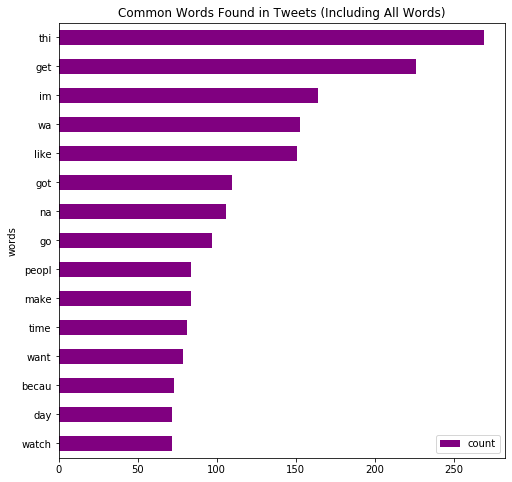

In [11]:
 fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

# Bigrams

In [12]:
#now creating bi-grams
terms_stop = [term.split() for term in (df_tweets['clean text']) ]
# Create list of lists containing bigrams in tweets
from nltk import bigrams
terms_bigram = [list(bigrams(tweet)) for tweet in terms_stop]
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('wan', 'na'), 40),
 (('gon', 'na'), 25),
 (('like', 'thi'), 20),
 (('never', 'get'), 16),
 (('hou', 'hou'), 12),
 (('thi', 'wa'), 10),
 (('best', 'friend'), 8),
 (('dreamfixedunit', 'dreamfixedunit'), 8),
 (('anyon', 'wan'), 8),
 (('get', 'thi'), 8),
 (('l', 'get'), 7),
 (('na', 'play'), 7),
 (('becau', 'wa'), 7),
 (('got', 'ta'), 6),
 (('play', 'game'), 6),
 (('year', 'old'), 6),
 (('doe', 'anyon'), 6),
 (('na', 'na'), 6),
 (('stay', 'home'), 6),
 (('got', 'new'), 6)]

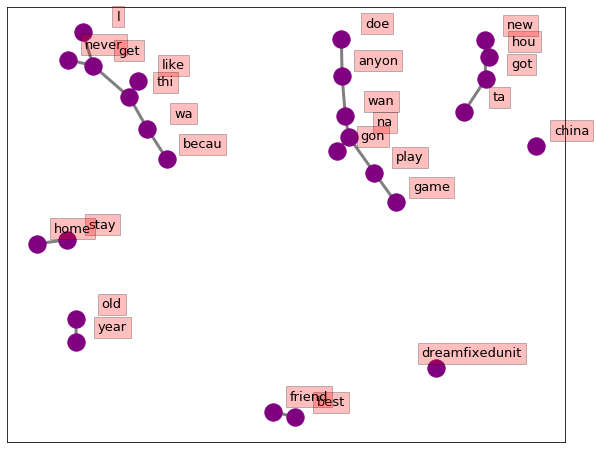

In [13]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

# the most frequent n-grams (cooccurrences of words)

In [14]:
from collections import defaultdict
# remember to include the other import from the previous post
 
com = defaultdict(lambda : defaultdict(int))
 
# f is the file pointer to the JSON data set
terms_only = [term for term in df_tweets['clean text']]
 
    # Build co-occurrence matrix
for i in range(len(terms_only)-1):            
    for j in range(i+1, len(terms_only)):
        w1, w2 = sorted([terms_only[i], terms_only[j]])                
        if w1 != w2:
            com[w1][w2] += 1

import operator
com_max = []
# For each term, look for the most common co-occurrent terms
for t1 in com:
    t1_max_terms = sorted(com[t1].items(), key=operator.itemgetter(1), reverse=True)[:5]
    for t2, t2_count in t1_max_terms:
        com_max.append(((t1, t2), t2_count))
# Get the most frequent co-occurrences
terms_max = sorted(com_max, key=operator.itemgetter(1), reverse=True)
print(terms_max[:5])

[(('af', 'im'), 140), (('fuck', 'im'), 120), (('im', 'reali'), 120), (('asf', 'im'), 100), (('im', 'thi'), 100)]


# Word Embedding

In [15]:
#-----word embedding---
#--using word embedding, to tell what words are most similar to some specified words.--

from gensim.models import Word2Vec
# define training data
sentences = [term.split() for term in (df_tweets['clean text']) ]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word

#----ENTER THE WORD HERE------
print(model['disapoint'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=4079, size=100, alpha=0.025)
['got', 'ta', 'stick', 'hand', 'think', 'u', 'feel', 'talk', 'anyon', 'need', 'entertain', 'life', 'bruh', 'plea', 'drop', 'someth', 'nah', 'may', 'end', 'get', 'take', 'nap', 'fan', 'want', 'see', 'long', 'green', 'flag', 'probabl', 'girl', 'wake', 'im', 'chivet', 'work', 'photo', 'start', 'watch', 'jumanji', 'yeah', 'dad', 'state', 'go', 'say', 'board', 'game', 'origin', 'thi', 'remak', 'trash', 'call', 'boomer', 'natur', 'went', 'rage', 'fit', 'ha', 'room', 'hey', 'hollywood', 'gen', 'z', 'indierulesok', 'doe', 'someon', 'wan', 'na', 'mal', 'ditch', 'studi', 'play', 'pusi', 'right', 'kik', 'dirtybab', 'fetpic', 'dm', 'bc', 'sendnud', 'paypig', 'nsfw', 'humanatm', 'babe', 'fotfetish', 'worship', 'butt', 'nudestrad', 'findomgod', 'kink', 'spoilm', 'make', 'miss', 'wrong', 'peopl', 'total', 'england', 'qualifi', 'perform', 'badli', 'tournament', 'come', 'back', 'quarter', 'golden', 'gener', 'piss', 'easi', 'group', 'next', 'one', 'repeat', 'i

C:\Users\Sssimon Lappy.LAPTOP-BPUEH71L\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


KeyError: "word 'disapoint' not in vocabulary"

# LDA Modeling

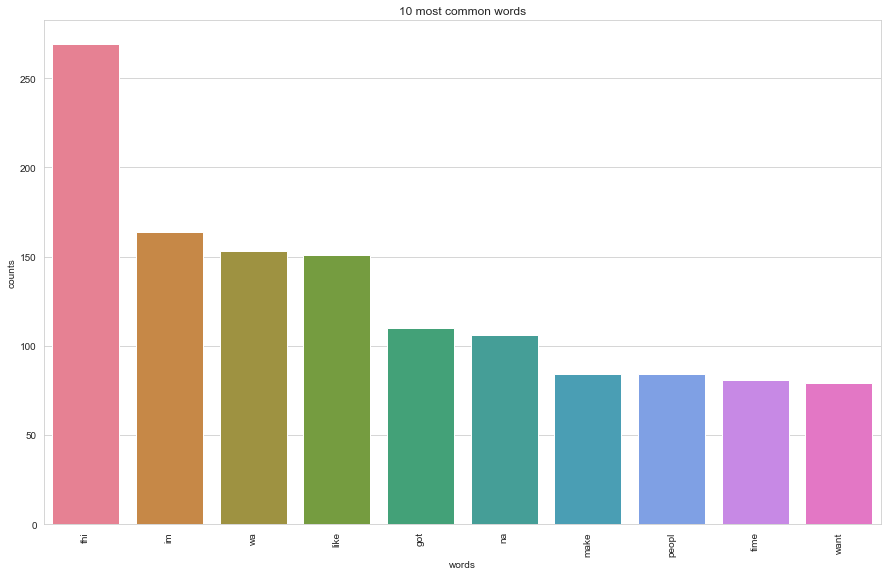

In [17]:
#-----LDA MODELLING
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_tweets['clean text'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

# Top 5 topics

In [18]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
na ko thi lang ako want ka like sa love

Topic #1:
got thi like wa na day watch new think want

Topic #2:
im reali na becau fight hungri peopl hell make veri

Topic #3:
im thi like hou watch quarantin peopl plea shit whi

Topic #4:
wa work thi make fuck time like use need day


In [19]:
%%time

from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)



Wall time: 15.1 s


In [20]:
with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)  

In [20]:
'''with open(LDAvis_data_filepath, 'w') as f:
        pickle.dump(LDAvis_prepared, f)   
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath) as f:
    LDAvis_prepared = pickle.load(f)'''
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')